# 01 — Загрузка данных EUR/USD из OANDA

Загружаем конфиг OANDA, подключаемся к v20 REST API, скачиваем свечи EUR/USD для M15 и H1, сохраняем данные в data/ и строим простой график для проверки.

In [4]:
import logging
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import pandas as pd

PROJECT_ROOT = Path.cwd().resolve()
if (PROJECT_ROOT / "src").exists():
    ROOT = PROJECT_ROOT
elif (PROJECT_ROOT.parent / "src").exists():
    ROOT = PROJECT_ROOT.parent
else:
    ROOT = PROJECT_ROOT

if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

from src.oanda_client import OandaClient, OandaConfig

logging.basicConfig(level=logging.INFO, format="%(levelname)s: %(message)s")

DATA_DIR = ROOT / "data"
CONFIG_PATH = ROOT / "config" / "oanda_config.example.json"


DATA_DIR.mkdir(parents=True, exist_ok=True)


In [5]:
config = OandaConfig.from_json(CONFIG_PATH)
client = OandaClient(config=config)

print(f"Base URL: {config.base_url}")

Base URL: https://api-fxpractice.oanda.com


In [6]:
account_details = client.get_account_details()
account_details

{'account': {'guaranteedStopLossOrderMode': 'ALLOWED',
  'hedgingEnabled': False,
  'id': '101-004-37622601-001',
  'createdTime': '2025-11-09T10:55:46.934444611Z',
  'currency': 'GBP',
  'createdByUserID': 37622601,
  'alias': 'Primary',
  'marginRate': '0.03333333333333',
  'lastTransactionID': '3',
  'balance': '100000.0000',
  'openTradeCount': 0,
  'openPositionCount': 0,
  'pendingOrderCount': 0,
  'pl': '0.0000',
  'resettablePL': '0.0000',
  'resettablePLTime': '0',
  'financing': '0.0000',
  'commission': '0.0000',
  'dividendAdjustment': '0',
  'guaranteedExecutionFees': '0.0000',
  'orders': [],
  'positions': [],
  'trades': [],
  'trueUnrealizedPL': '0.0000',
  'unrealizedPL': '0.0000',
  'trueNAV': '100000.0000',
  'NAV': '100000.0000',
  'marginUsed': '0.0000',
  'marginAvailable': '100000.0000',
  'positionValue': '0.0000',
  'marginCloseoutUnrealizedPL': '0.0000',
  'marginCloseoutNAV': '100000.0000',
  'marginCloseoutMarginUsed': '0.0000',
  'marginCloseoutPositionVal

In [7]:
INSTRUMENT = "EUR_USD"

eurusd_m15 = client.get_candles(INSTRUMENT, "M15", count=5000)
eurusd_h1 = client.get_candles(INSTRUMENT, "H1", count=5000)

eurusd_m15.head()
eurusd_h1.head()

,time,open,high,low,close,volume
0,2025-03-04 08:00:00+00:00,1.04930,1.05240,1.04863,1.05188,14551
1,2025-03-04 09:00:00+00:00,1.05188,1.05275,1.05094,1.05122,9979
2,2025-03-04 10:00:00+00:00,1.05120,1.05196,1.05026,1.05114,8983
3,2025-03-04 11:00:00+00:00,1.05113,1.05447,1.05096,1.05442,8813
4,2025-03-04 12:00:00+00:00,1.05444,1.05571,1.05361,1.05532,10830


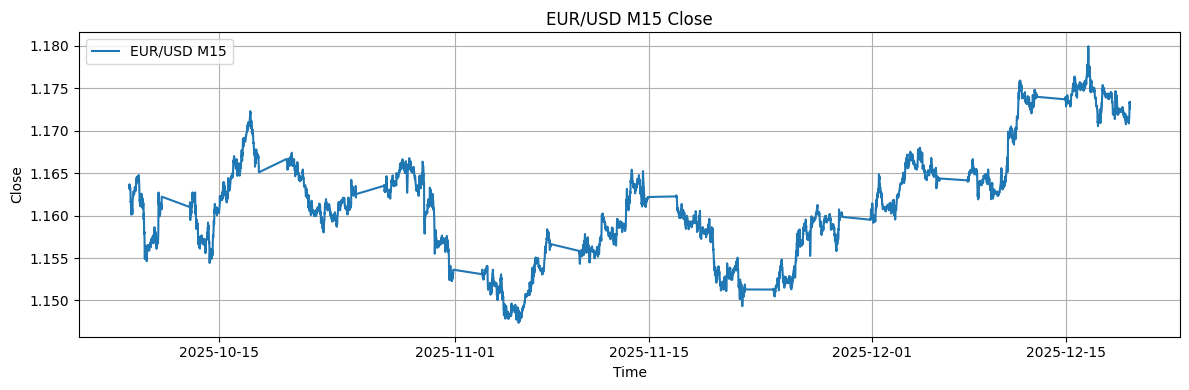

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(eurusd_m15["time"], eurusd_m15["close"], label="EUR/USD M15")
plt.title("EUR/USD M15 Close")
plt.xlabel("Time")
plt.ylabel("Close")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
m15_path = DATA_DIR / "eurusd_M15.parquet"
h1_path = DATA_DIR / "eurusd_H1.parquet"

eurusd_m15.to_parquet(m15_path, index=False)
eurusd_h1.to_parquet(h1_path, index=False)

print(f"Saved M15 to: {m15_path}")
print(f"Saved H1 to: {h1_path}")

Saved M15 to: /Users/oleksandrpc/Desktop/my projects/EUR_USD_MODEL/data/eurusd_M15.parquet
Saved H1 to: /Users/oleksandrpc/Desktop/my projects/EUR_USD_MODEL/data/eurusd_H1.parquet
